## Installation

In [ ]:
!pip install auto-sklearn
!sudo apt-get install build-essential swig python3-dev

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.4 MB 4.7 MB/s 
     |████████████████████████████████| 22.3 MB 1.4 MB/s 
     |████████████████████████████████| 1.1 MB 63.7 MB/s 
     |████████████████████████████████| 837 kB 67.7 MB/s 
     |████████████████████████████████| 4.3 MB 54.1 MB/s 
     |████████████████████████████████| 4.4 MB 50.1 MB/s 
     |████████████████████████████████| 260 kB 72.4 MB/s 
     |████████████████████████████████| 140 kB 62.1 MB/s 
     |████████████████████████████████| 596 kB 73.2 MB/s 
     |████████████████████████████████| 46 kB 4.7 MB/s 
  Created wheel for auto-sklearn: filename=auto_sklearn-0.14.7-py3-none-any.whl size=6602873 sha256=d7970732e9704bb1e7c0b0da098a4051284e2444100ccac3b4519e4743566b7d
  Stored in directory: /root/.cache/pip/wheels/ba/43/5c/2fbe6fd19e3af314cbc4aa808378068d8ddd6792064f4a2448
  Created wheel for pynisher: filename=pynisher-0.6.

## Classification

In [ ]:
import sklearn.datasets
import sklearn.metrics

import autosklearn.classification

In [ ]:
X, y = sklearn.datasets.load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y,random_state=1)

In [ ]:
automl = autosklearn.classification.AutoSklearnClassifier(
    time_left_for_this_task=180,
    per_run_time_limit=30,
    tmp_folder='./tmp/autosklearn_classification_example_tmp1',
)

automl.fit(X_train, y_train, dataset_name='breast_cancer')

AutoSklearnClassifier(per_run_time_limit=30, time_left_for_this_task=180,
                      tmp_folder='./tmp/autosklearn_classification_example_tmp1')

In [ ]:
print(automl.show_models())

{54: {'model_id': 54, 'rank': 1, 'cost': 0.007092198581560294, 'ensemble_weight': 0.06, 'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x7fe05299e890>, 'balancing': Balancing(random_state=1, strategy='weighting'), 'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice object at 0x7fe052a06850>, 'classifier': <autosklearn.pipeline.components.classification.ClassifierChoice object at 0x7fe052a84bd0>, 'sklearn_classifier': HistGradientBoostingClassifier(early_stopping=True, l2_regularization=1e-10,
                               learning_rate=0.06617178090723183, max_iter=256,
                               max_leaf_nodes=27, random_state=1,
                               warm_start=True)}, 7: {'model_id': 7, 'rank': 2, 'cost': 0.014184397163120588, 'ensemble_weight': 0.04, 'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x7

In [ ]:
print(automl.leaderboard())

          rank  ensemble_weight                 type      cost  duration
model_id                                                                
54           1             0.06    gradient_boosting  0.007092  2.164423
7            2             0.04          extra_trees  0.014184  1.508885
50           3             0.02          extra_trees  0.021277  1.501921
21           4             0.02          extra_trees  0.021277  1.422303
36           5             0.04  k_nearest_neighbors  0.028369  0.914694
51           6             0.04        liblinear_svc  0.028369  0.729218
19           7             0.02          extra_trees  0.028369  2.791693
14           8             0.04                  mlp  0.028369  2.063313
2            9             0.02        random_forest  0.028369  1.663790
11          10             0.04        random_forest  0.028369  2.245274
3           11             0.06                  mlp  0.028369  1.037658
6           12             0.04                  ml

In [ ]:
predictions = automl.predict(X_test)
print("Accuracy score:", sklearn.metrics.accuracy_score(y_test, predictions))

Accuracy score: 0.9440559440559441


In [ ]:
print(automl.sprint_statistics())
# https://scikit-learn.org/stable/modules/classes.html?highlight=metrics#module-sklearn.metrics 원하는 스코어확인가능

auto-sklearn results:
  Dataset name: breast_cancer
  Metric: accuracy
  Best validation score: 0.992908
  Number of target algorithm runs: 53
  Number of successful target algorithm runs: 53
  Number of crashed target algorithm runs: 0
  Number of target algorithms that exceeded the time limit: 0
  Number of target algorithms that exceeded the memory limit: 0



In [ ]:
from autosklearn.pipeline.components.classification import ClassifierChoice

for name in ClassifierChoice.get_components():
  print(name)

adaboost
bernoulli_nb
decision_tree
extra_trees
gaussian_nb
gradient_boosting
k_nearest_neighbors
lda
liblinear_svc
libsvm_svc
mlp
multinomial_nb
passive_aggressive
qda
random_forest
sgd


In [ ]:
from autosklearn.pipeline.components.feature_preprocessing import FeaturePreprocessorChoice

for name in FeaturePreprocessorChoice.get_components():
  print(name)

densifier
extra_trees_preproc_for_classification
extra_trees_preproc_for_regression
fast_ica
feature_agglomeration
kernel_pca
kitchen_sinks
liblinear_svc_preprocessor
no_preprocessing
nystroem_sampler
pca
polynomial
random_trees_embedding
select_percentile_classification
select_percentile_regression
select_rates_classification
select_rates_regression
truncatedSVD


In [ ]:
automl = autosklearn.classification.AutoSklearnClassifier(
    time_left_for_this_task=120,
    per_run_time_limit=30,
    tmp_folder='/tmp/autosklearn_imterpretable_models_example_tmp',
    include={
        'classifier':[
                      'decision_tree','lda','sgd'
        ],
        'feature_preprocessor':[
                                'no_preprocessing','polynomial','select_percentile_classification'
        ]
    },
    ensemble_size=1,
)
automl.fit(X_train, y_train, dataset_name='breast_cancer')

[WARNING] [2022-07-27 05:02:28,331:Client-AutoMLSMBO(1)::breast_cancer] Configuration 176 not found
[WARNING] [2022-07-27 05:02:28,333:Client-AutoMLSMBO(1)::breast_cancer] Configuration 162 not found
[WARNING] [2022-07-27 05:02:28,334:Client-AutoMLSMBO(1)::breast_cancer] Configuration 476 not found
[WARNING] [2022-07-27 05:02:28,334:Client-AutoMLSMBO(1)::breast_cancer] Configuration 601 not found
[WARNING] [2022-07-27 05:02:28,334:Client-AutoMLSMBO(1)::breast_cancer] Configuration 492 not found
[WARNING] [2022-07-27 05:02:28,334:Client-AutoMLSMBO(1)::breast_cancer] Configuration 440 not found
[WARNING] [2022-07-27 05:02:28,334:Client-AutoMLSMBO(1)::breast_cancer] Configuration 32 not found
[WARNING] [2022-07-27 05:02:28,334:Client-AutoMLSMBO(1)::breast_cancer] Configuration 220 not found
[WARNING] [2022-07-27 05:02:28,334:Client-AutoMLSMBO(1)::breast_cancer] Configuration 566 not found
[WARNING] [2022-07-27 05:02:28,334:Client-AutoMLSMBO(1)::breast_cancer] Configuration 332 not found
[

AutoSklearnClassifier(ensemble_size=1,
                      include={'classifier': ['decision_tree', 'lda', 'sgd'],
                               'feature_preprocessor': ['no_preprocessing',
                                                        'polynomial',
                                                        'select_percentile_classification']},
                      per_run_time_limit=30, time_left_for_this_task=120,
                      tmp_folder='/tmp/autosklearn_imterpretable_models_example_tmp')

## Regression

In [ ]:
import sklearn.datasets
import sklearn.metrics

import autosklearn.regression

In [ ]:
X, y = sklearn.datasets.load_boston(return_X_y=True)

X_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y,random_state=1)

In [ ]:
automl = autosklearn.regression.AutoSklearnRegressor(
    time_left_for_this_task=120,
    per_run_time_limit=30,
    tmp_folder='./tmp/autosklearn_regression_example_tmp',
)

automl.fit(X_train, y_train, dataset_name='boston')

[WARNING] [2022-07-27 05:06:21,083:Client-AutoMLSMBO(1)::boston] Dataset boston already in meta-data. Removing occurence.


AutoSklearnRegressor(per_run_time_limit=30, time_left_for_this_task=120,
                     tmp_folder='./tmp/autosklearn_regression_example_tmp')

In [ ]:
print(automl.show_models())

{2: {'model_id': 2, 'rank': 1, 'cost': 0.13891598944008077, 'ensemble_weight': 0.66, 'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x7fe04798f2d0>, 'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice object at 0x7fe04798e910>, 'regressor': <autosklearn.pipeline.components.regression.RegressorChoice object at 0x7fe04798e490>, 'sklearn_regressor': RandomForestRegressor(max_features=1.0, n_estimators=512, n_jobs=1,
                      random_state=1, warm_start=True)}, 3: {'model_id': 3, 'rank': 2, 'cost': 0.17320878878339163, 'ensemble_weight': 0.18, 'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x7fe04798f510>, 'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice object at 0x7fe0479aa410>, 'regressor': <autosklearn.pipeline.components.regression.RegressorChoice ob

In [ ]:
predictions = automl.predict(x_test)
print("R2 score:", sklearn.metrics.r2_score(y_test, predictions))

R2 score: 0.9049245707488001


## Multi-label Classification

In [ ]:
import numpy as np

import sklearn.datasets
import sklearn.metrics
from sklearn.utils.multiclass import type_of_target

import autosklearn.classification

In [ ]:
X, y = sklearn.datasets.fetch_openml(data_id=40594, return_X_y=True, as_frame=False)


y[y=='TRUE'] =1
y[y=='FALSE'] = 0
y = y.astype(np.int)

print(f"type_of_target={type_of_target(y)}")

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, random_state=1)

type_of_target=multilabel-indicator


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [ ]:
automl = autosklearn.classification.AutoSklearnClassifier(
    time_left_for_this_task=120,
    per_run_time_limit=30,
)

automl.fit(X_train, y_train, dataset_name='reuters')

[WARNING] [2022-07-27 05:15:52,272:Client-AutoMLSMBO(1)::reuters] Configuration 28 not found
[WARNING] [2022-07-27 05:15:52,272:Client-AutoMLSMBO(1)::reuters] Configuration 265 not found
[WARNING] [2022-07-27 05:15:52,272:Client-AutoMLSMBO(1)::reuters] Configuration 355 not found
[WARNING] [2022-07-27 05:15:52,272:Client-AutoMLSMBO(1)::reuters] Configuration 253 not found
[WARNING] [2022-07-27 05:15:52,273:Client-AutoMLSMBO(1)::reuters] Configuration 40 not found
[WARNING] [2022-07-27 05:15:52,273:Client-AutoMLSMBO(1)::reuters] Configuration 422 not found
[WARNING] [2022-07-27 05:15:52,273:Client-AutoMLSMBO(1)::reuters] Configuration 7 not found
[WARNING] [2022-07-27 05:15:52,273:Client-AutoMLSMBO(1)::reuters] Configuration 694 not found
[WARNING] [2022-07-27 05:15:52,273:Client-AutoMLSMBO(1)::reuters] Configuration 220 not found
[WARNING] [2022-07-27 05:15:52,273:Client-AutoMLSMBO(1)::reuters] Configuration 668 not found
[WARNING] [2022-07-27 05:15:52,273:Client-AutoMLSMBO(1)::reuters

AutoSklearnClassifier(per_run_time_limit=30, time_left_for_this_task=120)

In [ ]:
print(automl.sprint_statistics())

auto-sklearn results:
  Dataset name: reuters
  Metric: f1_macro
  Best validation score: 0.636957
  Number of target algorithm runs: 13
  Number of successful target algorithm runs: 10
  Number of crashed target algorithm runs: 0
  Number of target algorithms that exceeded the time limit: 1
  Number of target algorithms that exceeded the memory limit: 2



In [ ]:
predictions = automl.predict(X_test)
print("Accuracy score", sklearn.metrics.accuracy_score(y_test, predictions))

Accuracy score 0.616


## AutoGluon

In [ ]:
!pip install --upgrade pip --user
!pip install "mxnet_cu101<2.0.0, >=1.7.0"
!pip install autogluon

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 4.8 MB/s 
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 360.0/360.0 MB 4.4 MB/s eta 0:00:00
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.4/65.4 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.2/274.2 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from autogluon.tabular import TabularDataset, TabularPredictor

In [ ]:
train_data = TabularDataset('https://autogluon.s3.amazonaws.com/datasets/Inc/train.csv')
subsample_size = 500
train_data = train_data.sample(n=subsample_size, random_state=0)
train_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
6118,51,Private,39264,Some-college,10,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,>50K
23204,58,Private,51662,10th,6,Married-civ-spouse,Other-service,Wife,White,Female,0,0,8,United-States,<=50K
29590,40,Private,326310,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,44,United-States,<=50K
18116,37,Private,222450,HS-grad,9,Never-married,Sales,Not-in-family,White,Male,0,2339,40,El-Salvador,<=50K
33964,62,Private,109190,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,15024,0,40,United-States,>50K


In [ ]:
label = 'class'
print('summary of class variable: \n', train_data[label].describe())

summary of class variable: 
 count        500
unique         2
top        <=50K
freq         365
Name: class, dtype: object


In [ ]:
save_path = 'agModels-predictClass'
predcictor = TabularPredictor(label=label, path=save_path).fit(train_data)

Beginning AutoGluon training ...
AutoGluon will save models to "agModels-predictClass/"
AutoGluon Version:  0.5.1
Python Version:     3.7.13
Operating System:   Linux
Train Data Rows:    500
Train Data Columns: 14
Label Column: class
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [' >50K', ' <=50K']
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 =  >50K, class 0 =  <=50K
	Note: For your binary classification, AutoGluon arbitrarily selected which label-value represents positive ( >50K) vs negative ( <=50K) class.
	To explicitly set the positive_class, either rename classes to 1 and 0, or specify positive_class in Predictor init.
Using Feature Generators to preprocess the data ...
Fitting Aut

In [ ]:
test_data = TabularDataset('https://autogluon.s3.amazonaws.com/datasets/Inc/test.csv')
y_test = test_data[label]
test_data_nolab = test_data.drop(columns=[label])
test_data_nolab.head()

Loaded data from: https://autogluon.s3.amazonaws.com/datasets/Inc/test.csv | Columns = 15 / 15 | Rows = 9769 -> 9769


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,31,Private,169085,11th,7,Married-civ-spouse,Sales,Wife,White,Female,0,0,20,United-States
1,17,Self-emp-not-inc,226203,12th,8,Never-married,Sales,Own-child,White,Male,0,0,45,United-States
2,47,Private,54260,Assoc-voc,11,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,1887,60,United-States
3,21,Private,176262,Some-college,10,Never-married,Exec-managerial,Own-child,White,Female,0,0,30,United-States
4,17,Private,241185,12th,8,Never-married,Prof-specialty,Own-child,White,Male,0,0,20,United-States


In [ ]:
predictor = TabularPredictor.load(save_path)

y_pred = predictor.predict(test_data_nolab)
print("Predictions: \n", y_pred)
perf = predictor.evaluate_predictions(y_true=y_test, y_pred=y_pred, auxiliary_metrics=True)

Evaluation: accuracy on test data: 0.8374449790152523
Evaluations on test data:
{
    "accuracy": 0.8374449790152523,
    "balanced_accuracy": 0.7430558394221018,
    "mcc": 0.5243657567117436,
    "f1": 0.621904761904762,
    "precision": 0.69394261424017,
    "recall": 0.5634167385677308
}


Predictions: 
 0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
9764     <=50K
9765     <=50K
9766     <=50K
9767     <=50K
9768     <=50K
Name: class, Length: 9769, dtype: object


In [ ]:
predictor.leaderboard(test_data, silent=True)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,RandomForestGini,0.842973,0.84,0.528309,0.127254,0.998018,0.528309,0.127254,0.998018,1,True,5
1,CatBoost,0.842461,0.85,0.026980,0.008662,1.771967,0.026980,0.008662,1.771967,1,True,7
2,RandomForestEntr,0.841130,0.83,0.528885,0.109605,0.822160,0.528885,0.109605,0.822160,1,True,6
3,LightGBM,0.839799,0.85,0.078022,0.041768,0.819061,0.078022,0.041768,0.819061,1,True,4
4,XGBoost,0.837445,0.87,0.102716,0.016923,0.240808,0.102716,0.016923,0.240808,1,True,11
5,WeightedEnsemble_L2,0.837445,0.87,0.105170,0.017599,0.652505,0.002454,0.000676,0.411697,2,True,14
6,LightGBMXT,0.836421,0.83,0.040502,0.038431,3.097660,0.040502,0.038431,3.097660,1,True,3
7,ExtraTreesGini,0.833453,0.82,0.531344,0.109617,0.769327,0.531344,0.109617,0.769327,1,True,8
8,ExtraTreesEntr,0.832839,0.81,0.531111,0.105788,0.803675,0.531111,0.105788,0.803675,1,True,9
9,LightGBMLarge,0.828949,0.83,0.115016,0.010800,0.372901,0.115016,0.010800,0.372901,1,True,13


In [ ]:
pred_probs = predictor.predict_proba(test_data_nolab)
pred_probs.head(5)

,<=50K,>50K
0,0.982107,0.017893
1,0.988337,0.011663
2,0.573505,0.426495
3,0.998272,0.001728
4,0.990299,0.009701


In [ ]:
results = predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val  pred_time_val  fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0               XGBoost       0.87       0.016923  0.240808                0.016923           0.240808            1       True         11
1   WeightedEnsemble_L2       0.87       0.017599  0.652505                0.000676           0.411697            2       True         14
2              CatBoost       0.85       0.008662  1.771967                0.008662           1.771967            1       True          7
3        NeuralNetTorch       0.85       0.011872  2.524803                0.011872           2.524803            1       True         12
4              LightGBM       0.85       0.041768  0.819061                0.041768           0.819061            1       True          4
5      RandomForestGini       0.84       0.127254  0.998018                0.127254           0.998018        

In [ ]:
print("AutoGluon infers problem type is: ", predictor.problem_type)
print("AutoGluon identified the following types of features")
print(predictor.feature_metadata)

AutoGluon infers problem type is:  binary
AutoGluon identified the following types of features
('category', [])  : 7 | ['workclass', 'education', 'marital-status', 'occupation', 'relationship', ...]
('int', [])       : 6 | ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', ...]
('int', ['bool']) : 1 | ['sex']


In [ ]:
predictor.leaderboard(test_data, silent=True)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,RandomForestGini,0.842973,0.84,0.452028,0.127254,0.998018,0.452028,0.127254,0.998018,1,True,5
1,CatBoost,0.842461,0.85,0.032284,0.008662,1.771967,0.032284,0.008662,1.771967,1,True,7
2,RandomForestEntr,0.841130,0.83,0.427178,0.109605,0.822160,0.427178,0.109605,0.822160,1,True,6
3,LightGBM,0.839799,0.85,0.088875,0.041768,0.819061,0.088875,0.041768,0.819061,1,True,4
4,XGBoost,0.837445,0.87,0.115988,0.016923,0.240808,0.115988,0.016923,0.240808,1,True,11
5,WeightedEnsemble_L2,0.837445,0.87,0.119012,0.017599,0.652505,0.003024,0.000676,0.411697,2,True,14
6,LightGBMXT,0.836421,0.83,0.037817,0.038431,3.097660,0.037817,0.038431,3.097660,1,True,3
7,ExtraTreesGini,0.833453,0.82,0.532555,0.109617,0.769327,0.532555,0.109617,0.769327,1,True,8
8,ExtraTreesEntr,0.832839,0.81,0.528341,0.105788,0.803675,0.528341,0.105788,0.803675,1,True,9
9,LightGBMLarge,0.828949,0.83,0.131927,0.010800,0.372901,0.131927,0.010800,0.372901,1,True,13


In [ ]:
predictor.predict(test_data, model='LightGBM')

0        <=50K
1        <=50K
2         >50K
3        <=50K
4        <=50K
         ...  
9764     <=50K
9765     <=50K
9766     <=50K
9767     <=50K
9768     <=50K
Name: class, Length: 9769, dtype: object

### Maximizing predictive performance

In [ ]:
time_limit = 120
metric = 'roc_auc'
predictor = TabularPredictor(label, eval_metric=metric).fit(train_data, time_limit=time_limit, presets='best_quality')
predictor.leaderboard(test_data, silent=True)

No path specified. Models will be saved in: "AutogluonModels/ag-20220727_061101/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=0, num_bag_folds=5, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 120s
AutoGluon will save models to "AutogluonModels/ag-20220727_061101/"
AutoGluon Version:  0.5.1
Python Version:     3.7.13
Operating System:   Linux
Train Data Rows:    500
Train Data Columns: 14
Label Column: class
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [' >50K', ' <=50K']
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 =  >50K, class 0 =  <=50K
	Note: For your binary classification, AutoGluon arbitrarily selected which label-va

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBMXT_BAG_L1,0.900802,0.881867,0.285275,0.055553,8.636802,0.285275,0.055553,8.636802,1,True,3
1,CatBoost_BAG_L1,0.900744,0.892278,0.095633,0.073552,13.687657,0.095633,0.073552,13.687657,1,True,7
2,WeightedEnsemble_L2,0.897912,0.903298,2.311121,0.558160,45.207000,0.004202,0.001517,1.632824,2,True,14
3,LightGBM_BAG_L1,0.892347,0.866991,0.149308,0.053949,8.440971,0.149308,0.053949,8.440971,1,True,4
4,XGBoost_BAG_L1,0.891483,0.868006,0.214138,0.048908,6.172698,0.214138,0.048908,6.172698,1,True,11
5,RandomForestEntr_BAG_L1,0.886810,0.889011,0.325143,0.107135,0.806290,0.325143,0.107135,0.806290,1,True,6
6,NeuralNetFastAI_BAG_L1,0.885518,0.869508,0.765094,0.107107,12.138274,0.765094,0.107107,12.138274,1,True,10
7,RandomForestGini_BAG_L1,0.885092,0.887407,0.318113,0.144544,0.715313,0.318113,0.144544,0.715313,1,True,5
8,NeuralNetTorch_BAG_L1,0.882353,0.845906,0.809274,0.113944,16.410123,0.809274,0.113944,16.410123,1,True,12
9,ExtraTreesEntr_BAG_L1,0.880568,0.887681,0.320699,0.110137,0.709620,0.320699,0.110137,0.709620,1,True,9


In [ ]:
from pandas.core.common import random_state
from autogluon.tabular import TabularDataset, TabularPredictor

import numpy as np

train_data = TabularDataset('https://autogluon.s3.amazonaws.com/datasets/Inc/train.csv')
subsample_size=500
train_data = train_data.sample(n=subsample_size, random_state=0)
print(train_data.head())

label = 'occupation'
print("Summary of occupation column: \n", train_data['occupation'].describe())

new_data = TabularDataset('https://autogluon.s3.amazonaws.com/datasets/Inc/test.csv')
test_data = new_data[5000:].copy()
y_test = test_data[label]
test_data_nolabel = test_data.drop(columns=[label])
val_data = new_data[:5000].copy()
metric = 'accuracy'

Loaded data from: https://autogluon.s3.amazonaws.com/datasets/Inc/train.csv | Columns = 15 / 15 | Rows = 39073 -> 39073


       age workclass  fnlwgt      education  education-num  \
6118    51   Private   39264   Some-college             10   
23204   58   Private   51662           10th              6   
29590   40   Private  326310   Some-college             10   
18116   37   Private  222450        HS-grad              9   
33964   62   Private  109190      Bachelors             13   

            marital-status        occupation    relationship    race      sex  \
6118    Married-civ-spouse   Exec-managerial            Wife   White   Female   
23204   Married-civ-spouse     Other-service            Wife   White   Female   
29590   Married-civ-spouse      Craft-repair         Husband   White     Male   
18116        Never-married             Sales   Not-in-family   White     Male   
33964   Married-civ-spouse   Exec-managerial         Husband   White     Male   

       capital-gain  capital-loss  hours-per-week  native-country   class  
6118              0             0              40   United-State

Loaded data from: https://autogluon.s3.amazonaws.com/datasets/Inc/test.csv | Columns = 15 / 15 | Rows = 9769 -> 9769


In [ ]:
from networkx.generators.triads import triad_graph
import autogluon.core as ag

nn_options = {
    'num_epochs':10,
    'learning_rate': ag.space.Real(1e-4, 1e-2, default=5e-4, log=True),
    'activation': ag.space.Categorical('relu', 'softrelu', 'tanh'),
    'layers': ag.space.Categorical([100], [1000], [200,100], [300,200,100]),
    'dropout_prob': ag.space.Real(0.0, 0.5, default=0.1),
}

gbm_options = {
    'num_boost_round':100,
    'num_leaves':ag.space.Int(lower=26, upper=66, default=36),
}

hyperparameters = {
    'GBM': gbm_options,
    'NN': nn_options,
}

time_limit = 2*60

num_trials = 5

search_strategy = 'auto'

hyperparameter_tune_kwargs = {
    'num_trials': num_trials,
    'scheduler' : 'local',
    'searcher': search_strategy,
}

predictor = TabularPredictor(label=label, eval_metric=metric).fit(
    train_data, tuning_data=val_data, time_limit=time_limit,
    hyperparameters=hyperparameters, hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
)

No path specified. Models will be saved in: "AutogluonModels/ag-20220727_065746/"
Beginning AutoGluon training ... Time limit = 120s
AutoGluon will save models to "AutogluonModels/ag-20220727_065746/"
AutoGluon Version:  0.5.1
Python Version:     3.7.13
Operating System:   Linux
Train Data Rows:    500
Train Data Columns: 14
Tuning Data Rows:    5000
Tuning Data Columns: 14
Label Column: occupation
Preprocessing data ...
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == object).
	First 10 (of 15) unique label values:  [' Exec-managerial', ' Other-service', ' Craft-repair', ' Sales', ' Prof-specialty', ' Protective-serv', ' ?', ' Adm-clerical', ' Machine-op-inspct', ' Tech-support']
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Fraction of data from classes with at least 10 examples that wi

  0%|          | 0/5 [00:00<?, ?it/s]

Fitted model: LightGBM/T1 ...
	0.3033	 = Validation score   (accuracy)
	1.06s	 = Training   runtime
	0.18s	 = Validation runtime
Fitted model: LightGBM/T2 ...
	0.2899	 = Validation score   (accuracy)
	1.1s	 = Training   runtime
	0.13s	 = Validation runtime
Fitted model: LightGBM/T3 ...
	0.3238	 = Validation score   (accuracy)
	0.7s	 = Training   runtime
	0.06s	 = Validation runtime
Fitted model: LightGBM/T4 ...
	0.2809	 = Validation score   (accuracy)
	1.17s	 = Training   runtime
	0.36s	 = Validation runtime
Fitted model: LightGBM/T5 ...
	0.3108	 = Validation score   (accuracy)
	0.86s	 = Training   runtime
	0.07s	 = Validation runtime
Hyperparameter tuning model: NeuralNetMXNet ... Tuning model for up to 53.89s of the 113.43s of remaining time.


  0%|          | 0/5 [00:00<?, ?it/s]

		Starting in v0.6.0, calling TabularNeuralNetMxnetModel will raise an exception.
		Consider instead using TabularNeuralNetTorchModel via "NN_TORCH".
Fitted model: NeuralNetMXNet/T1 ...
	0.1468	 = Validation score   (accuracy)
	11.55s	 = Training   runtime
	0.67s	 = Validation runtime
Fitted model: NeuralNetMXNet/T2 ...
	0.1308	 = Validation score   (accuracy)
	3.95s	 = Training   runtime
	0.37s	 = Validation runtime
Fitted model: NeuralNetMXNet/T3 ...
	0.2094	 = Validation score   (accuracy)
	9.22s	 = Training   runtime
	1.69s	 = Validation runtime
Fitted model: NeuralNetMXNet/T4 ...
	0.0435	 = Validation score   (accuracy)
	3.67s	 = Training   runtime
	0.31s	 = Validation runtime
Fitted model: NeuralNetMXNet/T5 ...
	0.1257	 = Validation score   (accuracy)
	4.89s	 = Training   runtime
	0.4s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training model for up to 119.75s of the 70.55s of remaining time.
	0.3303	 = Validation score   (accuracy)
	1.71s	 = Training   runtime


In [ ]:
y_pred = predictor.predict(test_data_nolabel)
print("Predictions: ", list(y_pred)[:5])
perf = predictor.evaluate(test_data, auxiliary_metrics=False)

Predictions:  [' Exec-managerial', ' Craft-repair', ' Craft-repair', ' Adm-clerical', ' Sales']


Evaluation: accuracy on test data: 0.3036275948836234
Evaluations on test data:
{
    "accuracy": 0.3036275948836234
}


In [ ]:
results = predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2   0.330326       3.383070  33.676975                0.001709           1.706015            2       True         11
1           LightGBM/T3   0.323765       0.055195   0.703258                0.055195           0.703258            1       True          3
2           LightGBM/T5   0.310847       0.067591   0.864810                0.067591           0.864810            1       True          5
3           LightGBM/T1   0.303260       0.182759   1.057035                0.182759           1.057035            1       True          1
4           LightGBM/T2   0.289932       0.129085   1.097407                0.129085           1.097407            1       True          2
5           LightGBM/T4   0.280910       0.364599   1.173593                0.364599           1.173593 

In [ ]:
predictor = TabularPredictor(label=label, eval_metric=metric).fit(train_data, num_bag_folds=5, num_bag_sets=1, num_stack_levels=1,
                                                                  hyperparameters = {'NN':{'num_epochs': 2}, 'GBM':{'num_boost_round': 20}},
)

No path specified. Models will be saved in: "AutogluonModels/ag-20220727_070251/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20220727_070251/"
AutoGluon Version:  0.5.1
Python Version:     3.7.13
Operating System:   Linux
Train Data Rows:    500
Train Data Columns: 14
Label Column: occupation
Preprocessing data ...
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == object).
	First 10 (of 15) unique label values:  [' Exec-managerial', ' Other-service', ' Craft-repair', ' Sales', ' Prof-specialty', ' Protective-serv', ' ?', ' Adm-clerical', ' Machine-op-inspct', ' Tech-support']
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Fraction of data from classes with at least 10 examples that will be kept for training models: 0.978
Train Data Class Count: 12
Usi

In [ ]:
!pip install pycaret
!pip install markupsafe==2.0.1
!pip install explainerdashboard
!pip install autoviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 36.0 MB/s 
     |████████████████████████████████| 88 kB 8.1 MB/s 
     |████████████████████████████████| 6.8 MB 51.6 MB/s 
     |████████████████████████████████| 1.3 MB 34.1 MB/s 
     |████████████████████████████████| 56 kB 5.2 MB/s 
     |████████████████████████████████| 1.7 MB 48.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 167 kB 64.7 MB/s 
     |████████████████████████████████| 25.9 MB 1.4 MB/s 
     |████████████████████████████████| 10.4 MB 55.0 MB/s 
     |████████████████████████████████| 262 kB 75.2 MB/s 
     |████████████████████████████████| 2.0 MB 59.0 MB/s 
     |████████████████████████████████| 125 kB 76.8 MB/s 
     |████████████████████████████████|

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 305 kB 23.3 MB/s 
     |████████████████████████████████| 9.8 MB 64.7 MB/s 
     |████████████████████████████████| 62 kB 1.2 MB/s 
     |████████████████████████████████| 470 kB 65.6 MB/s 
     |███████████████████████████

In [ ]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
from pycaret.classification import *

clf = setup(data=df, target='target', train_size=0.8, session_id=10)
# 실행 후 data type 확인 후 Enter 입력

,Description,Value
0,session_id,10
1,Target,target
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(569, 31)"
5,Missing Values,False
6,Numeric Features,30
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
models()

INFO:logs:gpu_param set to False


,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [ ]:
rf = create_model('rf', fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9780,0.9974,0.9821,0.9821,0.9821,0.9536,0.9536
1,0.9670,0.9890,0.9821,0.9649,0.9735,0.9300,0.9302
2,0.9341,0.9921,0.9643,0.9310,0.9474,0.8592,0.8602
3,0.9670,0.9938,0.9825,0.9655,0.9739,0.9291,0.9294
4,0.9231,0.9600,0.9474,0.9310,0.9391,0.8347,0.8349
Mean,0.9538,0.9865,0.9717,0.9549,0.9632,0.9013,0.9017
Std,0.0213,0.0135,0.0140,0.0205,0.0168,0.0459,0.0457


In [ ]:
rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [ ]:
rf = create_model('rf', min_samples_leaf=3, fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9780,0.9980,0.9821,0.9821,0.9821,0.9536,0.9536
1,0.9560,0.9849,0.9821,0.9483,0.9649,0.9061,0.9071
2,0.9451,0.9908,0.9464,0.9636,0.9550,0.8845,0.8848
3,0.9670,0.9954,1.0000,0.9500,0.9744,0.9283,0.9307
4,0.9231,0.9605,0.9474,0.9310,0.9391,0.8347,0.8349
Mean,0.9538,0.9859,0.9716,0.9550,0.9631,0.9014,0.9022
Std,0.0189,0.0134,0.0212,0.0171,0.0151,0.0405,0.0408


In [ ]:
rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [ ]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9647,0.9926,0.9823,0.9623,0.9720,0.9242,0.9252,0.416
lightgbm,Light Gradient Boosting Machine,0.9624,0.9904,0.9750,0.9652,0.9698,0.9197,0.9207,0.143
rf,Random Forest Classifier,0.9581,0.9875,0.9751,0.9582,0.9665,0.9105,0.9112,0.453
ridge,Ridge Classifier,0.9560,0.0000,0.9929,0.9408,0.9657,0.9043,0.9084,0.010
lda,Linear Discriminant Analysis,0.9560,0.9914,0.9930,0.9404,0.9657,0.9045,0.9080,0.012
gbc,Gradient Boosting Classifier,0.9559,0.9906,0.9751,0.9551,0.9648,0.9056,0.9067,0.248
ada,Ada Boost Classifier,0.9537,0.9868,0.9750,0.9519,0.9631,0.9007,0.9021,0.114
qda,Quadratic Discriminant Analysis,0.9516,0.9920,0.9611,0.9613,0.9609,0.8975,0.8984,0.011
lr,Logistic Regression,0.9472,0.9922,0.9716,0.9456,0.9581,0.8866,0.8884,0.223
dt,Decision Tree Classifier,0.9339,0.9300,0.9469,0.9467,0.9463,0.8604,0.8621,0.014


In [ ]:
best = compare_models(sort = 'Recall')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.6198,0.5000,1.0000,0.6198,0.7653,0.0000,0.0000,0.008
lda,Linear Discriminant Analysis,0.9560,0.9914,0.9930,0.9404,0.9657,0.9045,0.9080,0.012
ridge,Ridge Classifier,0.9560,0.0000,0.9929,0.9408,0.9657,0.9043,0.9084,0.011
et,Extra Trees Classifier,0.9647,0.9926,0.9823,0.9623,0.9720,0.9242,0.9252,0.437
rf,Random Forest Classifier,0.9581,0.9875,0.9751,0.9582,0.9665,0.9105,0.9112,0.455
gbc,Gradient Boosting Classifier,0.9559,0.9906,0.9751,0.9551,0.9648,0.9056,0.9067,0.323
ada,Ada Boost Classifier,0.9537,0.9868,0.9750,0.9519,0.9631,0.9007,0.9021,0.113
lightgbm,Light Gradient Boosting Machine,0.9624,0.9904,0.9750,0.9652,0.9698,0.9197,0.9207,0.094
lr,Logistic Regression,0.9472,0.9922,0.9716,0.9456,0.9581,0.8866,0.8884,0.218
knn,K Neighbors Classifier,0.9252,0.9604,0.9644,0.9195,0.9410,0.8388,0.8425,0.111


In [ ]:
top3 = compare_models(n_select =3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9647,0.9926,0.9823,0.9623,0.9720,0.9242,0.9252,0.412
lightgbm,Light Gradient Boosting Machine,0.9624,0.9904,0.9750,0.9652,0.9698,0.9197,0.9207,0.095
rf,Random Forest Classifier,0.9581,0.9875,0.9751,0.9582,0.9665,0.9105,0.9112,0.453
ridge,Ridge Classifier,0.9560,0.0000,0.9929,0.9408,0.9657,0.9043,0.9084,0.010
lda,Linear Discriminant Analysis,0.9560,0.9914,0.9930,0.9404,0.9657,0.9045,0.9080,0.012
gbc,Gradient Boosting Classifier,0.9559,0.9906,0.9751,0.9551,0.9648,0.9056,0.9067,0.356
ada,Ada Boost Classifier,0.9537,0.9868,0.9750,0.9519,0.9631,0.9007,0.9021,0.114
qda,Quadratic Discriminant Analysis,0.9516,0.9920,0.9611,0.9613,0.9609,0.8975,0.8984,0.011
lr,Logistic Regression,0.9472,0.9922,0.9716,0.9456,0.9581,0.8866,0.8884,0.219
dt,Decision Tree Classifier,0.9339,0.9300,0.9469,0.9467,0.9463,0.8604,0.8621,0.014


In [ ]:
best3models = compare_models(sort='Accuracy', n_select=3, fold=2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9604,0.9911,0.9823,0.9553,0.9686,0.9151,0.9158,0.400
qda,Quadratic Discriminant Analysis,0.9516,0.9844,0.9574,0.9647,0.9608,0.8976,0.8983,0.015
lda,Linear Discriminant Analysis,0.9494,0.9767,0.9894,0.9337,0.9605,0.8904,0.8942,0.015
lr,Logistic Regression,0.9472,0.9863,0.9681,0.9481,0.9580,0.8871,0.8876,0.205
lightgbm,Light Gradient Boosting Machine,0.9472,0.9867,0.9610,0.9542,0.9576,0.8877,0.8878,0.050
ridge,Ridge Classifier,0.9407,0.0000,0.9894,0.9208,0.9538,0.8712,0.8757,0.020
ada,Ada Boost Classifier,0.9406,0.9852,0.9610,0.9442,0.9525,0.8734,0.8739,0.100
rf,Random Forest Classifier,0.9384,0.9832,0.9504,0.9500,0.9501,0.8696,0.8700,0.455
gbc,Gradient Boosting Classifier,0.9340,0.9845,0.9433,0.9495,0.9463,0.8607,0.8610,0.155
nb,Naive Bayes,0.9230,0.9864,0.9574,0.9217,0.9392,0.8345,0.8357,0.015


In [ ]:
best3models

[ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                      criterion='gini', max_depth=None, max_features='auto',
                      max_leaf_nodes=None, max_samples=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=10, verbose=0,
                      warm_start=False),
 QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                               store_covariance=False, tol=0.0001),
 LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                            solver='svd', store_covariance=False, tol=0.0001)]

### Optimize

#### tuned

In [ ]:
best = best3models[0]

In [ ]:
tuned_best = tune_model(best)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9783,0.9980,0.9643,1.0000,0.9818,0.9548,0.9558
2,0.9783,0.9980,1.0000,0.9655,0.9825,0.9539,0.9549
3,0.9565,0.9797,0.9655,0.9655,0.9655,0.9067,0.9067
4,0.9783,1.0000,1.0000,0.9667,0.9831,0.9528,0.9538
5,0.9333,0.9937,0.9643,0.9310,0.9474,0.8565,0.8575
6,0.9778,0.9979,0.9643,1.0000,0.9818,0.9533,0.9543
7,0.9778,0.9916,1.0000,0.9655,0.9825,0.9522,0.9533
8,0.9556,0.9874,0.9643,0.9643,0.9643,0.9055,0.9055


In [ ]:
print(best)
print(tuned_best)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=10, verbose=0,
                     warm_start=False)
ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=10, max_features='sqrt', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.0001,
                     min_impurity_split=None, min_samples_leaf=3,
                     min_samples_split=10, min_weight_fraction_leaf=0.0,
                     n_estimators=50, n_jobs=-1, oob_score=F

#### ensemble

In [ ]:
ensemble_best = ensemble_model(best)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9565,0.9960,0.9643,0.9643,0.9643,0.9087,0.9087
2,0.9783,1.0000,1.0000,0.9655,0.9825,0.9539,0.9549
3,0.9565,0.9838,0.9655,0.9655,0.9655,0.9067,0.9067
4,0.9783,0.9980,1.0000,0.9667,0.9831,0.9528,0.9538
5,0.9333,0.9958,0.9643,0.9310,0.9474,0.8565,0.8575
6,0.9556,0.9979,1.0000,0.9333,0.9655,0.9032,0.9075
7,0.9778,0.9916,1.0000,0.9655,0.9825,0.9522,0.9533
8,0.9556,0.9821,0.9643,0.9643,0.9643,0.9055,0.9055


In [ ]:
print(ensemble_best)

BaggingClassifier(base_estimator=ExtraTreesClassifier(bootstrap=False,
                                                      ccp_alpha=0.0,
                                                      class_weight=None,
                                                      criterion='gini',
                                                      max_depth=None,
                                                      max_features='auto',
                                                      max_leaf_nodes=None,
                                                      max_samples=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=1,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                              

#### blend

In [ ]:
blender_best = blend_models(estimator_list=best3models)
# blend는 모델 여러개 섞는거라서 성능좋은모델 3개 입력해야함

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9565,0.9960,0.9643,0.9643,0.9643,0.9087,0.9087
1,0.9565,0.9940,0.9643,0.9643,0.9643,0.9087,0.9087
2,0.9783,1.0000,1.0000,0.9655,0.9825,0.9539,0.9549
3,0.9565,0.9797,0.9655,0.9655,0.9655,0.9067,0.9067
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9333,1.0000,1.0000,0.9032,0.9492,0.8531,0.8625
6,0.9333,0.9916,1.0000,0.9032,0.9492,0.8531,0.8625
7,0.9778,0.9958,1.0000,0.9655,0.9825,0.9522,0.9533
8,0.9778,0.9916,1.0000,0.9655,0.9825,0.9522,0.9533


#### stack

In [ ]:
stack_best = stack_models(estimator_list = best3models)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9565,0.9921,0.9643,0.9643,0.9643,0.9087,0.9087
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9783,0.9940,1.0000,0.9655,0.9825,0.9539,0.9549
3,0.9565,0.9777,0.9655,0.9655,0.9655,0.9067,0.9067
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9778,1.0000,1.0000,0.9655,0.9825,0.9522,0.9533
6,0.9556,0.9958,1.0000,0.9333,0.9655,0.9032,0.9075
7,0.9778,0.9958,1.0000,0.9655,0.9825,0.9522,0.9533
8,0.9556,0.9958,0.9643,0.9643,0.9643,0.9055,0.9055


### Analyze

In [ ]:
!python -m pip uninstall matplotlib

Found existing installation: matplotlib 3.5.2
Uninstalling matplotlib-3.5.2:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.2-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.2.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)? y
  Successfully uninstalled matplotlib-3.5.2


In [ ]:
pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.5.2-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.2 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


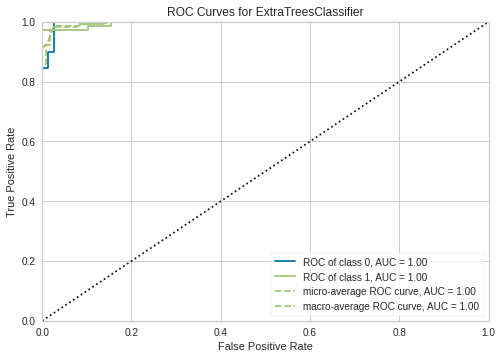

In [ ]:
import matplotlib.pyplot as plt

plot_model(best, 'auc')

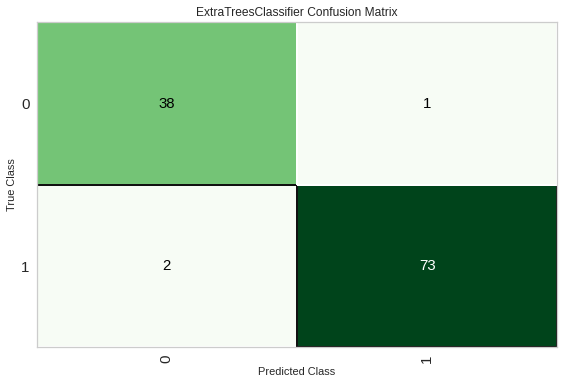

In [ ]:
plot_model(best, 'confusion_matrix')

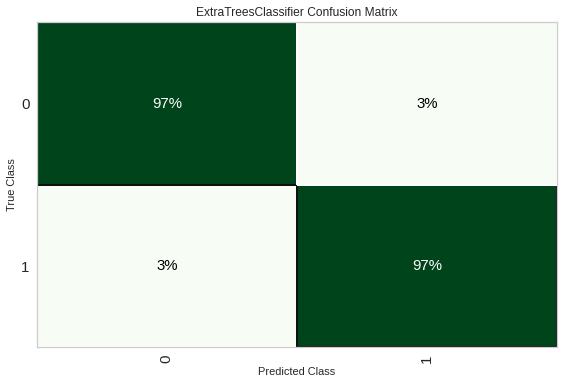

In [ ]:
plot_model(best, plot = 'confusion_matrix', plot_kwargs = {'percent': True})

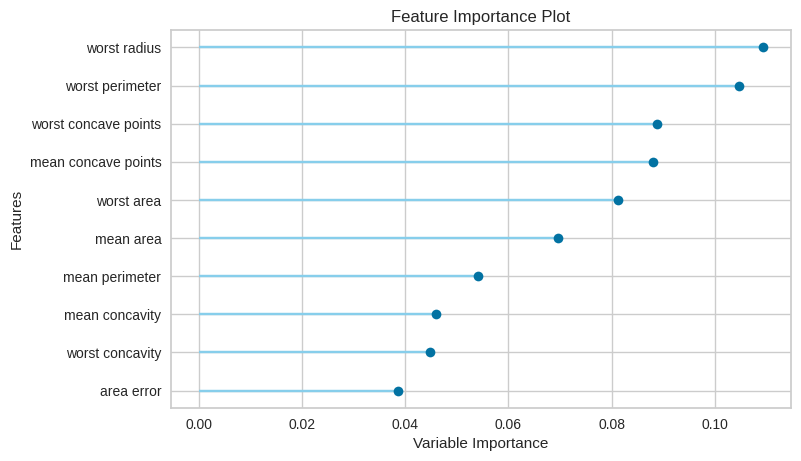

In [ ]:
plot_model(best, 'feature')

In [ ]:
final_model = finalize_model(best)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=10, verbose=0,
                     warm_start=False), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min

In [ ]:
pred = predict_model(best, data=df.iloc[-100:])

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=10, verbose=0,
                     warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.99,1.0,0.987,1.0,0.9935,0.9722,0.9726


In [ ]:
save_model(best, 'dt_pipeline')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=10, verbose=0,
                     warm_start=False), model_name=dt_pipeline, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], ta

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='target',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strat...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nod

In [ ]:
load_model('dt_pipeline')

INFO:logs:Initializing load_model()
INFO:logs:load_model(model_name=dt_pipeline, platform=None, authentication=None, verbose=True)


Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='target',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strat...
                 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                      class_weight=None, criterion='gini',
                                      max_depth=None, max_features='auto',
                                      max_leaf_nodes=None, max_samp

### Regression

In [ ]:
from pycaret.regression import *

clf = setup(data=df, target='target', train_size=0.8, session_id=10)

,Description,Value
0,session_id,10
1,Target,target
2,Original Data,"(569, 31)"
3,Missing Values,False
4,Numeric Features,30
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(455, 29)"


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='target',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy=...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthrough'),
              

In [ ]:
models()

INFO:logs:gpu_param set to False


,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [ ]:
from pycaret.datasets import get_data
data = get_data('jewellery')

,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130


### Clustering

In [ ]:
from pycaret.clustering import *
s = setup(data, normalize=True)

,Description,Value
0,session_id,5546
1,Original Data,"(505, 4)"
2,Missing Values,False
3,Numeric Features,4
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(505, 4)"
9,CPU Jobs,-1


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='UNSUPERVISED_DUMMY_TARGET',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='most frequent',
                                fill_value_categorical=None,
                                fill_value_numerical=None...
                ('P_transform', 'passthrough'), ('binn', 'passthrough'),
                ('rem_outliers', 'passthrough'), ('cluster_all', 'passthrough'),
                ('dummy', Dummify(target='UNSUPERVIS

In [ ]:
models()

INFO:logs:gpu_param set to False


,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch
kmodes,K-Modes Clustering,kmodes.kmodes.KModes


In [ ]:
kmeans = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7581,1611.2649,0.3743,0,0,0


INFO:logs:create_model_container: 1
INFO:logs:master_model_container: 1
INFO:logs:display_container: 2
INFO:logs:KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=5546, tol=0.0001, verbose=0)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
print(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=5546, tol=0.0001, verbose=0)


In [ ]:
evaluate_model(kmeans)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=5546, tol=0.0001, verbose=0), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Cluster PCA Plot (2d)', …